# This is week3 activities.
---
## Goal
In this in-class quiz, you will learn:

* unsupervised learning
-- Try to use KMeans for clustering.

We will take a ttbar event to be an example.

Scikit-learn package: KMeans will help us cluster the event.

Clustering Ref: https://scikit-learn.org/stable/modules/clustering.html#k-means

KMeans Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


* supervised learning

In this section,you will use scikit learn module as a supervise learning to deal with a regression problem. 


    


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week03/Linear_data.npy
/kaggle/input/phys591000-week03/Bonus.npy
/kaggle/input/phys591000-week03/pseudo_cluster.npz
/kaggle/input/phys591000-week03/X_Val.csv
/kaggle/input/phys591000-week03/ttbar_one_event.npz
/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz
/kaggle/input/phys591000-week03/Projectile_data.npy
/kaggle/input/phys591000-week03/Example_data.npy


# First Part- Unsupervised Learning: KMeans

KMeans Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

---

### We will take a ttbar event to be an example.
### The figure below is visualization of this event in the $\eta$ and $\phi$ plane.
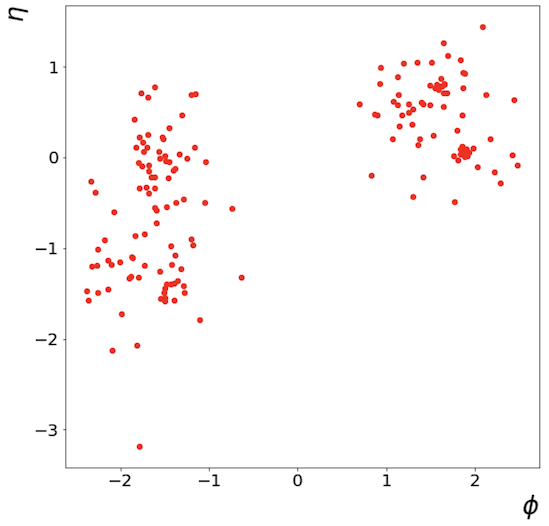

### Please follow examples and exercises to understand how to implement **KMeans** to cluster.

## Example 1.1

In [2]:
"""
We can use numpy and matlplotlib to load and visualize our pseudo-data set.
This cell teach you how to load data and show column name.
"""
# Load pseudodata 

pseudo_cluster = np.load("/kaggle/input/phys591000-week03/pseudo_cluster.npz") 

length_label = pseudo_cluster.files
print(length_label)

['ax_x', 'ax_y']


## Exercise 1.1

In [3]:
"""
Please load "/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz" and print column name.
"""
################################################################################################################
#Your code in this section

ttbar = np.load("/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz")

length_column_name = ttbar.files

print(length_column_name)
################################################################################################################

# Check your result is correct or not.
assert len(length_column_name) == 2, print(f"Your array is not match the request. The length of your array is: {len(length_column_name)}")
assert length_column_name[1] == "phi", print(f"Your first array element is not match the request. The third array element of your array is: {length_column_name[2]}")
print("Quiz 01 is passed!")

['eta', 'phi']
Quiz 01 is passed!


## Example 1.2

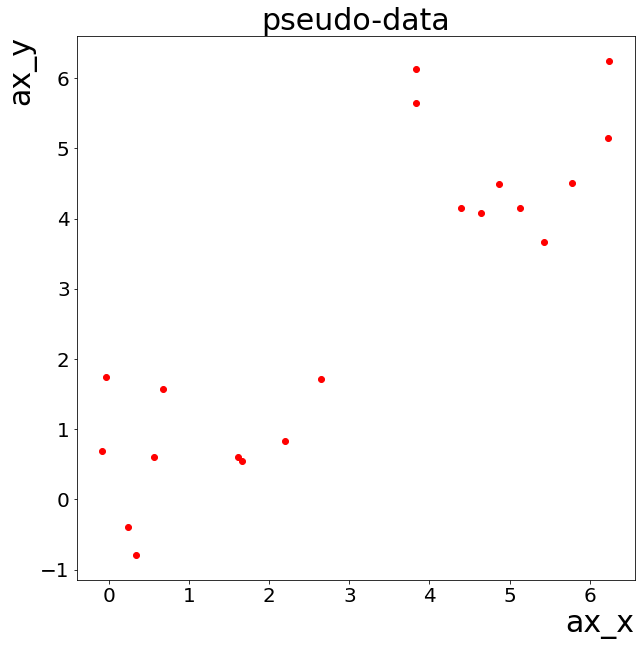

In [4]:
"""
We can use numpy and matlplotlib to load and visualize our pseudo-data set.
This cell teach you how to visualize the data into a scatter plot.
"""

fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.scatter(pseudo_cluster["ax_x"],pseudo_cluster["ax_y"], c= "red")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("ax_y", fontsize=30,horizontalalignment='right',y=1)
plt.xlabel("ax_x", fontsize=30,horizontalalignment='right',x=1)
plt.title("pseudo-data", fontsize=30)

plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

## Exercise 1.2

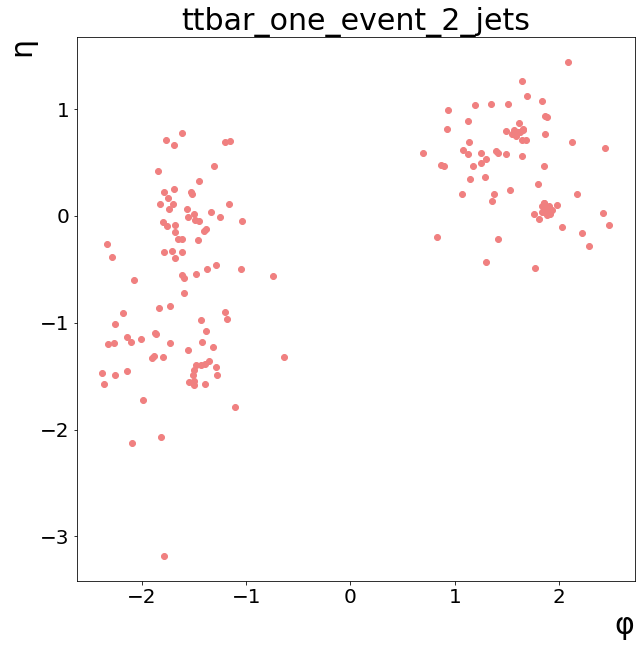

In [5]:
"""
Please load "/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz" and plot into "eta" and "phi" plane.
"""
################################################################################################################
#Your code in this section

fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.scatter(ttbar["phi"],ttbar["eta"], c= "lightcoral")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("η", fontsize=30,horizontalalignment='right',y=1)
plt.xlabel("φ", fontsize=30,horizontalalignment='right',x=1)
plt.title("ttbar_one_event_2_jets", fontsize=30)

plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()


################################################################################################################

# Check your result is correct or not.
# Once you get the figure, please rise your hand and let TA check your result.

## Example 1.3

In [6]:
"""
We will use "KMeans" in scikit-learn to cluster our pseudo data.
In this example, we want to cluster pseudo data according to "ax_x" and "ax_y" information.
"""
from sklearn.cluster import KMeans

pseudo_cluster = np.load("/kaggle/input/phys591000-week03/pseudo_cluster.npz")  # load pseudodata
length_label = pseudo_cluster.files
print("Labels: {}".format(length_label))

# change our data form for KMeans
X = []
for i in range(len(pseudo_cluster["ax_x"])):
    X.append([pseudo_cluster["ax_x"][i],pseudo_cluster["ax_y"][i]])
    
# Use "KMeans" to cluster pseudo data into two clusters
kmeans_cluster = KMeans(n_clusters=2, random_state=0).fit(X)

print("Use kmeans_cluster.labels_ to get clustering result: {}".format(kmeans_cluster.labels_))


Labels: ['ax_x', 'ax_y']
Use kmeans_cluster.labels_ to get clustering result: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


## Exercise 1.3

In [7]:
"""
Please load "/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz" and use "KMeans" in scikit-learn to cluster this data.
You can set n_clusters to a reasonable value.
We want to cluster a ttbar event according to "eta" and "phi" information.
And then use ".labels_" to get clustering result.
"""
################################################################################################################
#Your code in this section

from sklearn.cluster import KMeans

ttbar = np.load("/kaggle/input/phys591000-week03/ttbar_one_event_2_jets.npz")  # load pseudodata
length_column_name = ttbar.files
print("Labels: {}".format(length_column_name))

# change our data form for KMeans
X = []
for i in range(len(ttbar["phi"])):
    X.append([ttbar["phi"][i],ttbar["eta"][i]])
    
# Use "KMeans" to cluster pseudo data into two clusters
kmeans_cluster = KMeans(n_clusters=2, random_state=0).fit(X)

print("Use kmeans_cluster.labels_ to get clustering result: {}".format(kmeans_cluster.labels_))





################################################################################################################

# Check your result is correct or not.
assert len(kmeans_cluster.labels_) == 169, print(f"Your array is not match the request. The length of your array is: {len(kmeans_cluster.labels_)}")
assert kmeans_cluster.labels_[147] == 1, print(f"Your 148th array element is not match the request. The 148th array element of your array is: {kmeans_cluster.labels_[147]}")
print("Quiz 03 is passed!")

Labels: ['eta', 'phi']
Use kmeans_cluster.labels_ to get clustering result: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Quiz 03 is passed!


## Example 1.4

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 169

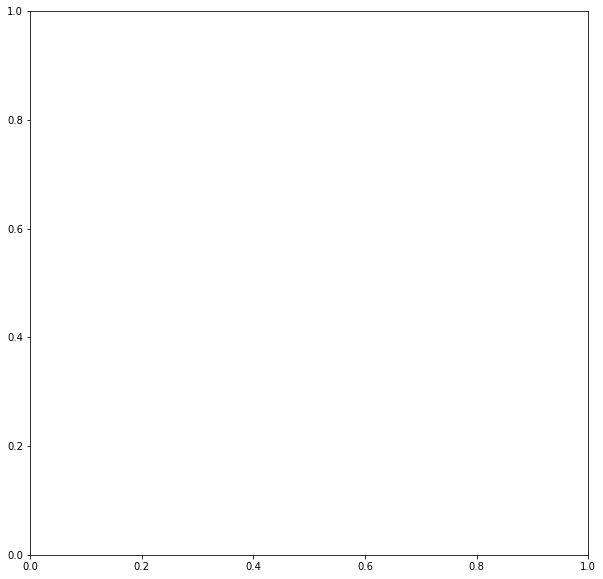

In [8]:
"""
Visualize the clustering result.
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

cls_0 = kmeans_cluster.labels_ == 0 # pick the first cluster
cls_1 = kmeans_cluster.labels_ == 1 # pick the second cluster
# put the first cluster into scatter plot in blue
plt.scatter(pseudo_cluster["ax_x"][cls_0],pseudo_cluster["ax_y"][cls_0], c= "blue", label = "KMeans cluster 1") 
# put the second cluster into scatter plot in cyan
plt.scatter(pseudo_cluster["ax_x"][cls_1],pseudo_cluster["ax_y"][cls_1], c= "cyan", label = "KMeans cluster 2")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("ax_y", fontsize=30,horizontalalignment='right',y=1)
plt.xlabel("ax_x", fontsize=30,horizontalalignment='right',x=1)
plt.title("pseudo-data", fontsize=30)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

## Exercise 1.4

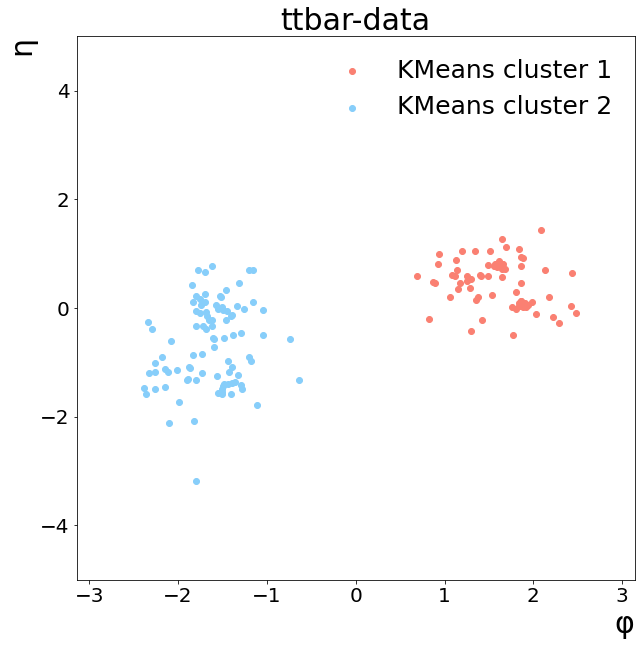

In [9]:
"""
Please visualize the clustering result from previous excerise.
Please let the each cluster be different color.
"""
################################################################################################################
#Your code in this section

fig, ax = plt.subplots(1,1, figsize=(10,10))

cls_0 = kmeans_cluster.labels_ == 0 # pick the first cluster
cls_1 = kmeans_cluster.labels_ == 1 # pick the second cluster
# put the first cluster into scatter plot in blue
plt.scatter(ttbar["phi"][cls_0],ttbar["eta"][cls_0], c= "salmon", label = "KMeans cluster 1") 
# put the second cluster into scatter plot in cyan
plt.scatter(ttbar["phi"][cls_1],ttbar["eta"][cls_1], c= "lightskyblue", label = "KMeans cluster 2")

plt.xlim(-np.pi,np.pi)
plt.ylim(-5,5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("η", fontsize=30,horizontalalignment='right',y=1)
plt.xlabel("φ", fontsize=30,horizontalalignment='right',x=1)
plt.title("ttbar-data", fontsize=30)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()




################################################################################################################

# Check your result is correct or not.
# Once you get the figure, please rise your hand and let TA check your result.

# Second Part- Linear Regression

* goal: In this section,you will use scikit learn module as a supervise learning to deal with a regression problem. 

## Example 2.1:
* Load data and plot a scatter diagram


ex_data shape: (3, 2)


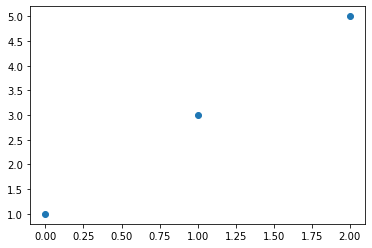

In [10]:
ex = np.load('/kaggle/input/phys591000-week03/Example_data.npy')
print('ex_data shape:', ex.shape)
# Data Format: column0 for x axis, column1 for y axis
# Split the data and plot
x_data = ex[:,0]
y_data = ex[:,1]

plt.scatter(x_data,y_data)
plt.show()

## Exercise 2.1:
* Please load "/kaggle/input/phys591000-week03/Linear_data.npy" and plot scatter diagram.

lonear_data shape: (10, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

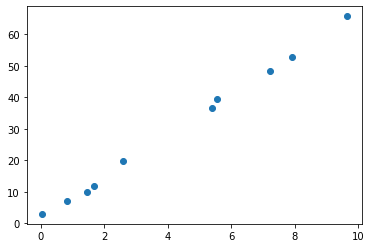

In [11]:
################################################################################################################
#Your code in this section

linear = np.load('/kaggle/input/phys591000-week03/Linear_data.npy')
print('lonear_data shape:', linear.shape)

data_x = linear[:,0]
data_y = linear[:,1]
plt.scatter(data_x, data_y)
plt.show
################################################################################################################

## Example 2.2
* Use scikit-learn build a simple linear model

* Check the data size. Attention that you need to transfer the input data into a 2-D array while using 'LinearRegression()'.

* Find out the slope and the interception and save.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
from sklearn.linear_model import LinearRegression

print('x_data shape: ', x_data.shape)
# Reshape data: scikit-learn module needs a 2-D array input data, you need to insure the data size.
x_data = np.reshape(x_data, (len(x_data),1))
print('Reshape: ',x_data.shape)

# Create a linear model and fit with data:
model = LinearRegression()
model.fit(x_data, y_data)

# As a linear function, slope and intercept can be find out at model.coef_ and model.intercept_
slope = model.coef_[0]
intercept = model.intercept_
print('\nslope:',slope)
print('intercept:',intercept)

x_data shape:  (3,)
Reshape:  (3, 1)

slope: 1.9999999999999996
intercept: 1.0000000000000004


## Exercise 2.2:
* Please use scikit learn module to built a linear model and predict data.

In [13]:
################################################################################################################
#Your code in this section
from sklearn.linear_model import LinearRegression
print('data_x shape:', data_x.shape)

data_x = np.reshape(data_x,(len(data_x),1))
print('data_x reshape:', data_x.shape )

model = LinearRegression()
model.fit(data_x, data_y)

slope = model.coef_[0]
intercept = model.intercept_
################################################################################################################

# Check your result is correct or not.
assert slope >= 6.5 and slope <= 6.7, print(f"Wrong Slope")
assert intercept >=1.5 and intercept <= 2, print(f"Wrong Interception")
print("Quiz 03 is passed!")

data_x shape: (10,)
data_x reshape: (10, 1)
Quiz 03 is passed!


## Example 2.3
* plot the result as a linear regression, the two diagram(scatter, predicted line) should plot in one figure. 

* x data have a range in (0,10)

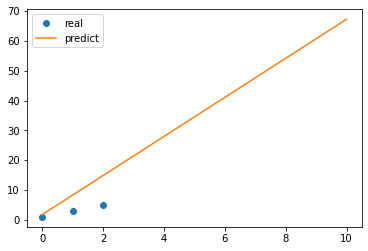

In [14]:
# Give your model a predict with x in [0,10]:
xfit = np.linspace(0,10,100)
xfit = np.reshape(xfit,(100,1))  # Remember to reshape your data before putting in the model.

yfit = model.predict(xfit)
plt.plot(x_data,y_data,'o',label='real')
plt.plot(xfit,yfit,label='predict')
plt.legend()
plt.show()

## Exercise 2.3
* Visualizing predict result:



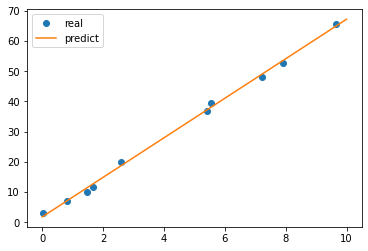

In [15]:
################################################################################################################
#Your code in this section

fit_x = np.linspace(0, 10, 100)
fit_x = np.reshape(fit_x, (100,1))

fit_y = model.predict(fit_x)
plt.plot(data_x,data_y,'o',label='real')
plt.plot(fit_x,fit_y,label='predict')
plt.legend()
plt.show()
################################################################################################################